In [2]:
!pip install -q kaggle
!kaggle datasets download -d ankitbansal06/retail-orders

Dataset URL: https://www.kaggle.com/datasets/ankitbansal06/retail-orders
License(s): CC0-1.0
100% 200k/200k [00:00<00:00, 406kB/s]
100% 200k/200k [00:00<00:00, 406kB/s]


In [3]:
!unzip -o retail-orders.zip -d data/




Archive:  retail-orders.zip
  inflating: data/orders.csv         


In [4]:
import pandas as pd

df = pd.read_csv('/content/data/orders.csv')
df.head(5)

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [6]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'Not Available', 'unknown',
       'First Class', nan, 'Same Day'], dtype=object)

In [7]:
import numpy as np

# Replace 'Not Available' and 'unknown' with np.nan in the 'Ship Mode' column
df['Ship Mode'] = df['Ship Mode'].replace(['Not Available', 'unknown'], np.nan)

# Check the unique values after replacement
print(df['Ship Mode'].unique())

['Second Class' 'Standard Class' nan 'First Class' 'Same Day']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9988 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
df.head(5)

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


calculating the discount

In [11]:
df['discount']=df['list_price']*df['discount_percent']*.01

In [12]:
df['sale_price'] = df['list_price'] - df['discount']


In [13]:
df['profit'] =  df['list_price'] - df['cost_price']


In [20]:
df['order_date'] = pd.to_datetime(df['order_date'],format='%Y-%m-%d')

In [16]:
df = df.drop(columns=['cost_price', 'list_price', 'discount_percent'])


In [21]:
df.dtypes

,0
order_id,int64
order_date,datetime64[ns]
ship_mode,object
segment,object
country,object
city,object
state,object
postal_code,int64
region,object
category,object


In [22]:
df.head(5)


,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sale_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,20
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,130
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,0
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,180
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-34-fded209d2a57>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['segment'], y=df['profit'], estimator=sum, palette="pastel")


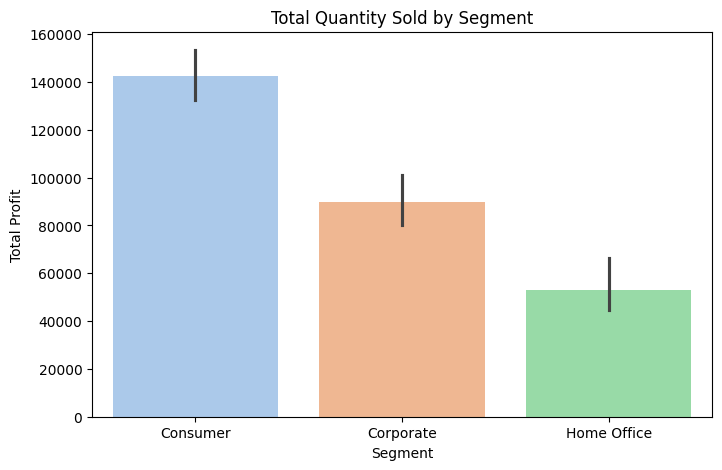

In [34]:

plt.figure(figsize=(8, 5))
sns.barplot(x=df['segment'], y=df['profit'], estimator=sum, palette="pastel")
plt.title("Total Quantity Sold by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Profit")
plt.show()


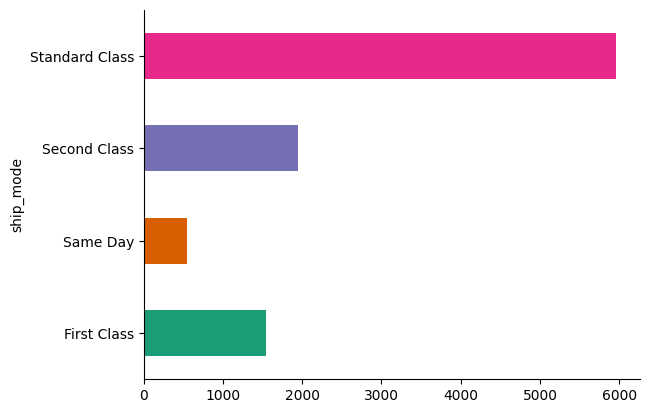

In [25]:

df.groupby('ship_mode').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-28-0e45279dec12>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['sale_price'].sum().plot(figsize=(12, 6), title="Monthly Sales Trend", xlabel="Date", ylabel="Sales", color='blue')


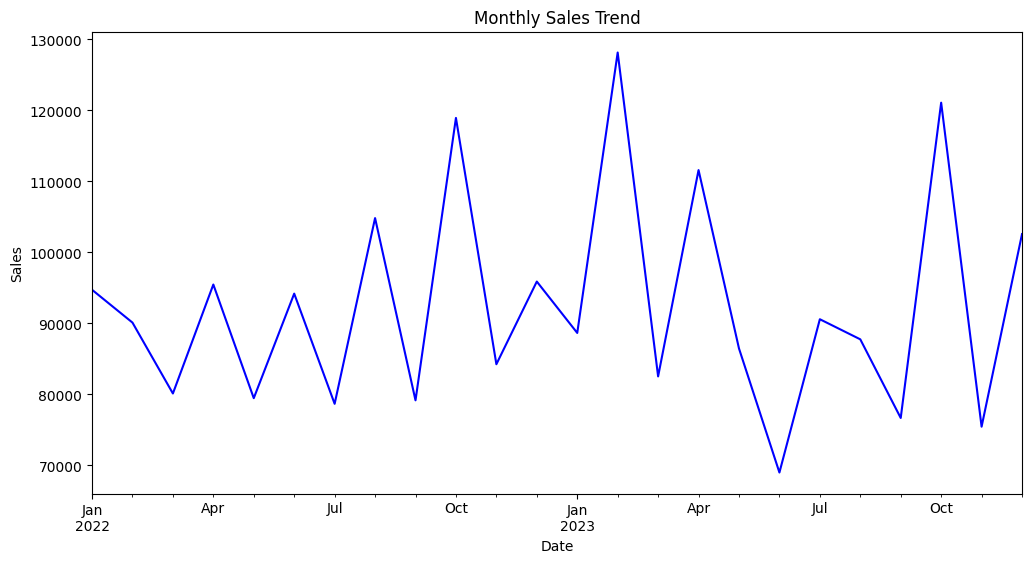

In [28]:

df['order_date'] = pd.to_datetime(df['order_date'])
df.set_index('order_date', inplace=True)

# Monthly Sales Trend
df.resample('M')['sale_price'].sum().plot(figsize=(12, 6), title="Monthly Sales Trend", xlabel="Date", ylabel="Sales", color='blue')
plt.show()


<ipython-input-29-7cee4f6c02b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.groupby('category')['sale_price'].sum().index, y=df.groupby('category')['sale_price'].sum().values, palette="coolwarm")


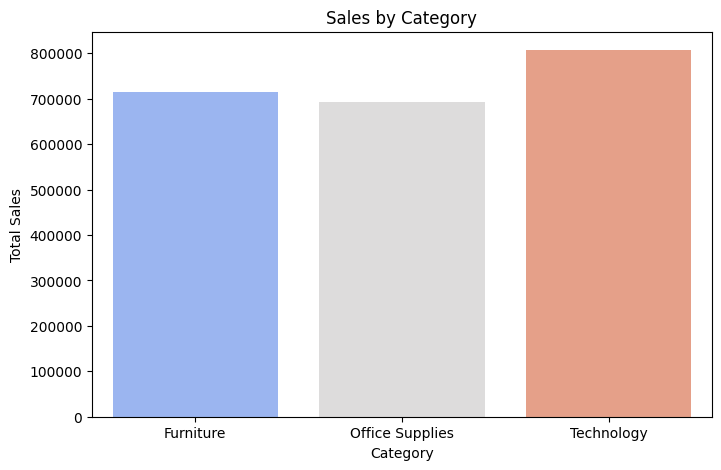

In [29]:
plt.figure(figsize=(8, 5))
sns.barplot(x=df.groupby('category')['sale_price'].sum().index, y=df.groupby('category')['sale_price'].sum().values, palette="coolwarm")
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()



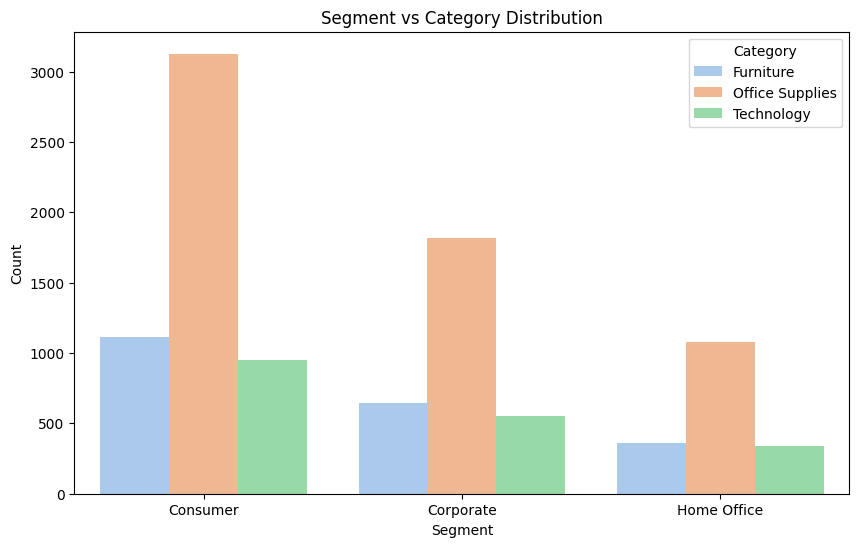

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['segment'], hue=df['category'], palette="pastel")
plt.title("Segment vs Category Distribution")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.legend(title="Category")
plt.show()


In [19]:

# from google.colab import files

# Save the DataFrame to a CSV file
df.to_csv('processed_data.csv', index=False)

# # Download the CSV file
# files.download('processed_data.csv')
